<a href="https://colab.research.google.com/github/sameer203/Tensorflow_/blob/main/05_Computer_vision_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

ROOT = "/content/drive/MyDrive/Tensorflow"

os.chdir(ROOT)

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Get the Data

In [6]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downladed file

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-10-22 03:17:21--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.125.128, 142.250.157.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M  36.7MB/s    in 2.8s    

2021-10-22 03:17:24 (36.7 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



### Inspecting the Data

In [7]:
!ls pizza_steak

test  train


In [8]:
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 1 images in pizza_steak
There are 2 directories and 1 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 2 directories and 1 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza


In [9]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [10]:
# Get the classnames programatically
import pathlib
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names = class_names[1:]
class_names

array(['pizza', 'steak'], dtype='<U9')

In [11]:
# Visualize images
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"image shape : {img.shape}")

  return img

['129536.jpg']
image shape : (512, 384, 3)


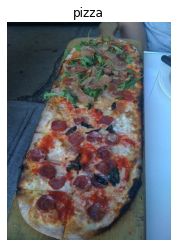

In [12]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

['2724554.jpg']
image shape : (342, 512, 3)


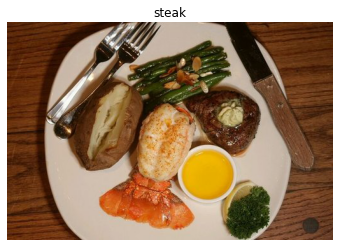

In [13]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

### End to End Example

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
# Set random seed
tf.random.set_seed(42)

#Preprocess data
train_datagen = ImageDataGenerator(rescale=1./255.)
valid_datagen = ImageDataGenerator(rescale=1./255.)

#setup data paths
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

#import data from directories and trun into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model
model_1 = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(filters=10,
                                                             kernel_size=3,
                                                             activation="relu",
                                                             input_shape=(224,224,3)),
                                      tf.keras.layers.Conv2D(10,3, activation="relu"),
                                      tf.keras.layers.MaxPool2D(pool_size=2,
                                                                padding="valid"),
                                      tf.keras.layers.Conv2D(10, 3, activation="relu"),
                                      tf.keras.layers.Conv2D(10,3, activation="relu"),
                                      tf.keras.layers.MaxPool2D(2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps = len(valid_data))



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 46s 315ms/step - loss: 0.5813 - accuracy: 0.6733 - val_loss: 0.4423 - val_accuracy: 0.7820
Epoch 2/5
47/47 [==============================] - 13s 286ms/step - loss: 0.4093 - accuracy: 0.8080 - val_loss: 0.3173 - val_accuracy: 0.8720
Epoch 3/5
47/47 [==============================] - 14s 293ms/step - loss: 0.3714 - accuracy: 0.8293 - val_loss: 0.3440 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 13s 283ms/step - loss: 0.3599 - accuracy: 0.8387 - val_loss: 0.2993 - val_accuracy: 0.8760
Epoch 5/5
47/47 [==============================] - 14s 296ms/step - loss: 0.3098 - accuracy: 0.8780 - val_loss: 0.3572 - val_accuracy: 0.8500
